In [3]:
import os
import sys
import numpy as np
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import pylab as plt

from morphopy.neurontree import NeuronTree as nt
from morphopy.neurontree.utils import get_standardized_swc

In [310]:
def plot_swc(file_path, ax, offset=0, depth=500.0, thickness=1000.0,
             dendrite_color='r', axon_color='darkgreen', soma_color='k', 
             s=.05, minwidth=0, soma_s=3, offset_mode = 'soma'):
    
    swc = pd.read_csv(file_path, delim_whitespace=True, comment='#',
                      names=['n', 'type', 'x', 'y', 'z', 'radius', 'parent'], index_col=False)
    
    dendrites = swc['type'] == 3
    axons = swc['type'] == 2
    soma = swc['type'] == 1
    
    swc['x'] = swc['x']/thickness
    swc['y'] = swc['y']/thickness
        
    soma_loc = swc.iloc[0][['x', 'y']]
    soma_loc['y'] = soma_loc['y'] + depth/thickness
    
    to_plot = np.zeros_like(dendrites)
    if dendrite_color!='none':
        to_plot |= dendrites
    if axon_color!='none':
        to_plot |= axons
    width = np.max(swc['x'][to_plot]) - np.min(swc['x'][to_plot])
    if offset_mode != 'soma':
        offset += np.abs(np.min(swc['x'][to_plot]-soma_loc['x']))
    if width < minwidth:
        offset += (minwidth-width)/2
        width = minwidth          
    soma_loc['x'] = soma_loc['x'] - offset
    
    if dendrite_color!='none':
        ax.scatter(swc['x'][dendrites]-soma_loc['x'], swc['y'][dendrites]-soma_loc['y'], 
                   s=s, c=dendrite_color, edgecolors='none', rasterized=True)
    if axon_color!='none':
        ax.scatter(swc['x'][axons]-soma_loc['x'], swc['y'][axons]-soma_loc['y'], 
                s=s, c=axon_color, edgecolors='none', rasterized=True)
    if soma_color!='none':
        ax.scatter(swc['x'][soma]-soma_loc['x'], swc['y'][soma]-soma_loc['y'], 
                s=s, c=soma_color, edgecolors='none', rasterized=True)
    else:
        ax.scatter(offset, -depth/thickness, s=soma_s, c='k', edgecolors='none')
        
    ax.set_aspect('equal')        
    return width

In [311]:
def readSWC(swcFile):
    # Open the SWC file
    f_id = open(swcFile, 'r')
    count = 0
    SWC = []

    # Read the file line by line
    for line in f_id:
        tem = line.strip()
        if tem[0] != '#':
            count += 1
            SWC.append(list(map(float, tem.split())))

    # Convert the SWC list to a numpy array
    SWC = np.array(SWC)

    # Close the file
    f_id.close()

    return SWC

In [312]:
import matplotlib.pyplot as plt
import numpy as np

def plotSWC(file_path, ax, offset=0, depth=500.0, thickness=1000.0,
             dendrite_color='blue', axon_color='darkred', soma_color='k', 
             dendrite_width=1, axon_width=.5, minwidth=0, soma_s=3, offset_mode = 'soma'):
    
    # if 'ax' not in locals().keys():
    #     fig, ax = plt.subplots()
    
    SWC = pd.read_csv(swcFile, delim_whitespace=True, comment='#',
                      names=['n', 'type', 'x', 'y', 'z', 'radius', 'parent'], index_col='n')

    # reorganize data and plot the morphology.    
    S = SWC['type'] == 1
    if np.sum(S):
        SWC_s = SWC[S]
        
    A = SWC['type'] == 2
    if np.sum(A):
        SWC_a = SWC[A]

    D = SWC['type'] == 3
    if np.sum(D):
        SWC_d = SWC[D]

    Apical = SWC['type']== 4
    if np.sum(Apical):
        SWC_apical = SWC[Apical, :]

    
    # plot the axon
    if np.sum(A) > 0:
        x1 = []
        x0 = []
        y1 = []
        y0 = []
        for i in SWC_a.index[1:]:
            x1.append(SWC_a['x'][i])
            y1.append(SWC_a['y'][i])
            x0.append(SWC_a['x'][SWC_a['parent'][i]])
            y0.append(SWC_a['y'][SWC_a['parent'][i]])
        x = np.array([x0, x1])
        y = np.array([y0, y1])
        ax.plot(x, y, color=axon_color, linewidth=axon_width)
        
    # plot the apical dendrites
    if np.sum(Apical):
        x1 = []
        x0 = []
        y1 = []
        y0 = []
        for i in SWC_apical.index[1:]:
            x1.append(SWC_apical['x'][i])
            y1.append(SWC_apical['y'][i])
            x0.append(SWC_apical['x'][SWC_apical['parent'][i]])
            y0.append(SWC_apical['y'][SWC_apical['parent'][i]])
        x = np.array([x0, x1])
        y = np.array([y0, y1])
        ax.plot(x, y, color=dendrite_color, linewidth=dendrite_width)       

    if np.sum(D):
        nDen = np.sum(SWC_d['parent']==-1)
        for n in range(nDen-1):
            den = SWC_d.loc[idx[n]:idx[n+1]-1]
            x1 = []
            x0 = []
            y1 = []
            y0 = []
            for i in den.index[1:]:
                x1.append(den['x'][i])
                y1.append(den['y'][i])
                x0.append(den['x'][den['parent'][i]])
                y0.append(den['y'][den['parent'][i]])
            x = np.array([x0, x1])
            y = np.array([y0, y1])
            ax.plot(x, y, color=dendrite_color,linewidth=dendrite_width)  
 
    # plot the Soma and fill it.
    ax.fill(SWC_s['x'], SWC_s['y'], 'k')

    ax.set_aspect('equal')
    plt.show()

In [ ]:
swcFile = './dataMorph/moreData/20231006_inter/Inter_1.swc'
SWC = readSWC(swcFile)

0.7646999999999999

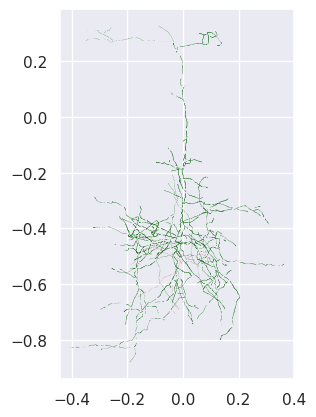

In [313]:
swcFile = './dataMorph/moreData/20231006_inter/Inter_1.swc'
fig, ax = plt.subplots()
plot_swc(swcFile,ax)

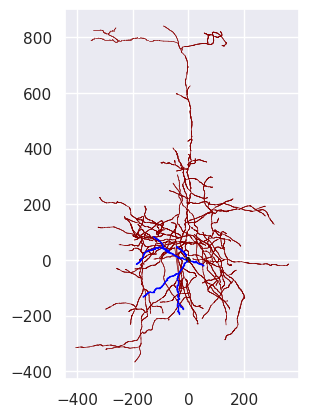

In [309]:
swcFile = './dataMorph/moreData/20231006_inter/Inter_1.swc'
fig, ax = plt.subplots()
plotSWC(swcFile,ax)
# fig.savefig('./figures/testFigure.pdf',dpi=600)

# Trash codes...

In [288]:
hasattr(locals(), 'SWC')

False

In [3]:
path = './dataMorph/TPCA_swc/'
dt = pd.read_csv(path+'somaDepth_tem.csv')
# cellnames = np.array(dt['filename'])
cellnames = dt['filename']
somaDepth = dt['somaDepth']

cellPath = list()
cellDepth = list()
for cell,depth in zip(cellnames,somaDepth):
    filename = os.path.splitext(cell)
    cellname = filename[0]+'.swc'
    cellPath.append(path+cellname)
    cellDepth.append(depth)   
    

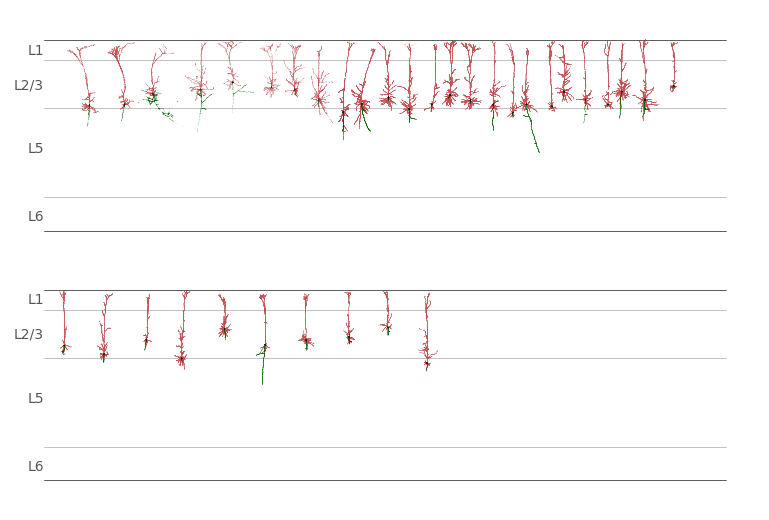

In [11]:
plt.figure(figsize=(7.5, 25))
# path = './dataMorph/VENL_swc/'
# path = './dataMorph/moreData/20220516_swc/'
startnewaxis = True
rows=10
colCounter=0
w=0
currentrow = 0
typerowgaps = [.03,.3,.32,.31,.1,.08,.1]
rowoffsets = [ 0.5,0.22,0.32,0,0,0,0,0,0,0,0]

files = cellPath
for n,file in enumerate(files):
    splitFiles = os.path.splitext(file)
    if splitFiles[1]=='.swc':        
        if startnewaxis:
            ax = plt.axes([0,(rows-currentrow-1)/rows, 1, 1.0/rows])
            ax.patch.set_alpha(0)
            plt.axis('equal')
            plt.xticks([])
            plt.yticks([])
            sns.despine(ax=ax, left=True, top=False)
            w = rowoffsets[currentrow]
            startnewaxis = False
            colCounter=0
            # plot the layer boaders.
            for y in [0,2.1]:
                plt.plot([0,7.5], [-y,-y], linewidth=.5, zorder=0, color='k')
            for y in [0.22,0.75,1.73]:
                plt.plot([0,7.5], [-y,-y], linewidth=.5, zorder=0, color='#aaaaaa')
            for y,L in zip([-0.12,-0.5,-1.2,-1.95], ['L1', 'L2/3', 'L5', 'L6']):
                plt.text(0, y, L, fontsize=10, color='#555555', va='center', ha='right')  
            

        width = plot_swc(file, ax, depth=cellDepth[n], dendrite_color='r', thickness=2000, offset= w)        
        colCounter += 1
        w += width

        if w>7:
            colCounter=0
            startnewaxis = True
            currentrow += 1
            if currentrow > rows:
                break
        else:
            # w += width
            w += typerowgaps[currentrow]
            
plt.savefig('./figures/VEN_panel-.pdf', dpi=600)

In [189]:
colCounter

0

In [144]:
k=os.path.splitext('20200505-5A-L-150-ven-1.swc')
k[1]

'.swc'

In [125]:
plot_swc('./dataMorph/VENL_swc/180913S463C1RNA462.swc', ax_cortex, offset= 0.5,dendrite_color='r')

0.55257

In [126]:
ax_cortex.patch.set_alpha(0)

In [ ]:
# ax_cortex2 = plt.axes([0.5, 0, 0.1, 0.5], zorder=-1)
plot_swc('./dataMorph/VENL_swc/180913S463C1RNA462.swc', ax_cortex, offset= 0.5,dendrite_color='r')
ax_cortex.patch.set_alpha(0)
plt.axis('equal')
aspect = 7.2/3
plt.xticks([])
plt.yticks([])
sns.despine(ax=ax_cortex, left=True, top=False)

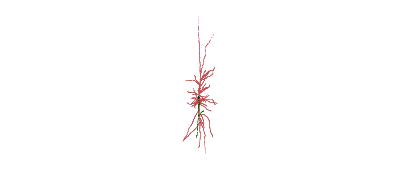

In [82]:
plt.figure(figsize=(38, 3))
ax_cortex2 = plt.axes([0.6, .059, 0.1, 0.5], zorder=-1)
plot_swc('./dataMorph/VENL_swc/180913S463C1RNA462.swc', ax_cortex2, dendrite_color='r')
ax_cortex2.patch.set_alpha(0)
plt.axis('equal')
aspect = 7.2/3
plt.xticks([])
plt.yticks([])
sns.despine(ax=ax_cortex2, left=True, top=False)


In [11]:
base_path=''

file_path = base_path + './dataMorph/VENL_swc/'
saving_path = base_path + './dataMorph/processed/nt/'
print(file_path)

for root, _, files in os.walk(file_path):
    # print(files)
    for f in files:
        
        if f.find('swc') > -1:
            
            input_file = root + '/' + f
            print('Preprocessing file %s ...'%input_file)
            swc = pd.read_csv(input_file, delim_whitespace=True, comment='#',
                              names=['n', 'type', 'x', 'y', 'z', 'radius', 'parent'], index_col=False, header=None)

            # switch y and z since y corresponds to cortical depth
            swc = swc.rename(columns={'y': 'z', 'z': 'y'})
            # soma center for standardization
            rotated_swc = get_standardized_swc(swc, pca_rot=False)

            
            N = nt.NeuronTree(swc=rotated_swc)
            # Resample neuron at distance 1 micron
            N = N.resample_tree(dist=1)
            # Smooth neurites in y direction
            N = N.smooth_neurites(dim=1, window_size=21)
            
            N.write_to_swc(file_name=f[:-4], path=saving_path)

./dataMorph/VENL_swc/
Preprocessing file ./dataMorph/VENL_swc//180913S463C1RNA462.swc ...
There are more than 3 soma points. The location and the radius of the soma is estimated based on its convex hull...
Preprocessing file ./dataMorph/VENL_swc//180913S463C1RNA463.swc ...
There are more than 3 soma points. The location and the radius of the soma is estimated based on its convex hull...
Preprocessing file ./dataMorph/VENL_swc//180913S463C1RNA472.swc ...
There are more than 3 soma points. The location and the radius of the soma is estimated based on its convex hull...
Preprocessing file ./dataMorph/VENL_swc//180913S473C16-40X.swc ...
There are more than 3 soma points. The location and the radius of the soma is estimated based on its convex hull...
Preprocessing file ./dataMorph/VENL_swc//180921S504C1RNA504.swc ...
There are more than 3 soma points. The location and the radius of the soma is estimated based on its convex hull...
Preprocessing file ./dataMorph/VENL_swc//180921S504C1RNA506